In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [78]:
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline
    imblearn_available = True
except:
    imblearn_available = False

sns.set(style="whitegrid")

In [79]:
df = pd.read_csv("/content/telecom_challenge_limpio_corregido.csv")
print("Dimensiones:", df.shape)
display(df.head())

Dimensiones: (0, 21)


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges


	Eliminación de Columnas Irrelevantes

In [80]:
cols_irrelevantes = ["customerID"]  # agrega otras si quedaron
df = df.drop(columns=cols_irrelevantes, errors="ignore")
df.shape

(0, 21)

Encoding

In [81]:
y = df["Churn"].astype(int)
X = df.drop(columns=["Churn"])

In [82]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: []
Categóricas: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']


In [83]:
preprocess_no_scale = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", num_cols)
])

preprocess_with_scale = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(), num_cols)
])

Verificación de la Proporción de Cancelación (Churn)

In [84]:
prop = y.value_counts(normalize=True).rename({0:"No Churn",1:"Churn"})
print("Proporción de clases:\n", prop)

Proporción de clases:
 Series([], Name: proportion, dtype: float64)


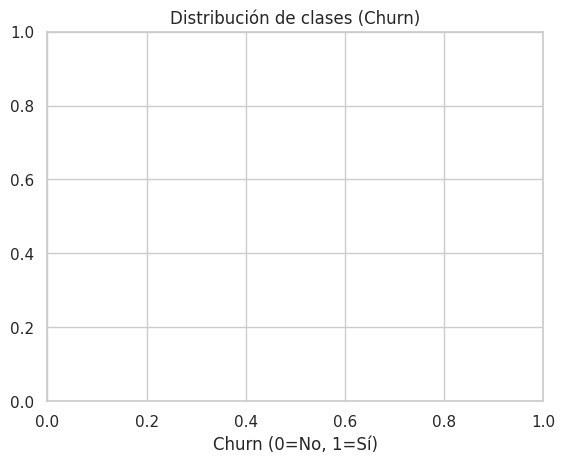

In [85]:
sns.countplot(x=y)
plt.title("Distribución de clases (Churn)")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.show()

	Balanceo de Clases

In [86]:
use_smote = imblearn_available and (y.mean() < 0.30 or y.mean() > 0.70)
print("¿Usar SMOTE?:", use_smote)

¿Usar SMOTE?: False


CORRELACION Y SELECCIÓN DE VARIABLES

In [87]:
num_for_corr = [c for c in num_cols if c in df.columns] + ["Churn"]
corr = df[num_for_corr].corr(numeric_only=True)



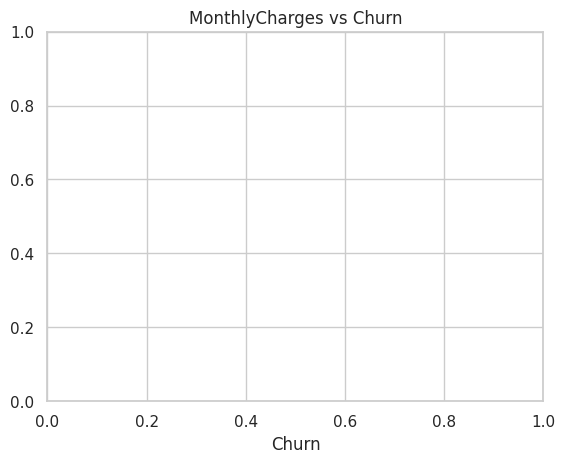

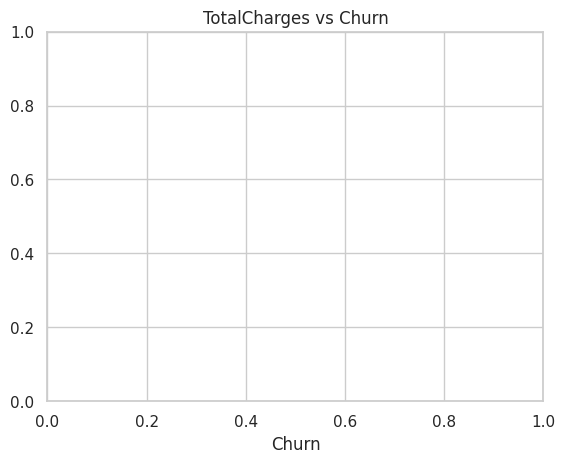

In [88]:
sns.boxplot(x=y, y=df["MonthlyCharges"])
plt.title("MonthlyCharges vs Churn")
plt.xlabel("Churn"); plt.show()

sns.boxplot(x=y, y=df["TotalCharges"])
plt.title("TotalCharges vs Churn")
plt.xlabel("Churn"); plt.show()

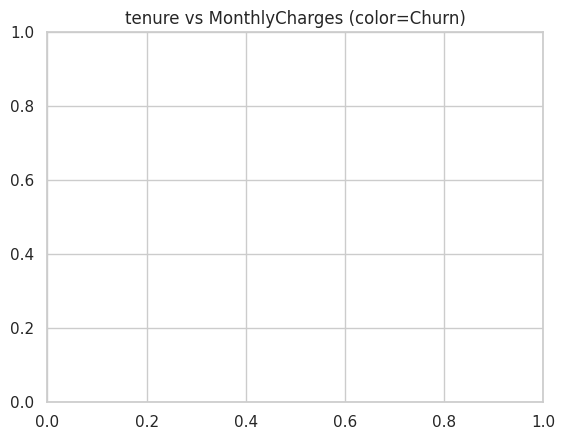

In [89]:
sns.scatterplot(x=df["tenure"], y=df["MonthlyCharges"], hue=y, alpha=0.6)
plt.title("tenure vs MonthlyCharges (color=Churn)")
plt.show()

In [90]:
print(df.columns.tolist())


['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']


In [91]:
print(df.columns.tolist())


['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']


In [ ]:
from google.colab import files
uploaded = files.upload()
